<a href="https://colab.research.google.com/github/NamanVerma27/Movie_Review_Sentiment_Analysis/blob/main/Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing important libraries and Modules**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer

import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')

# **Loading The Dataset**

In [44]:
%%time
dtype_dict = {
    'Ratings': 'int8',  # Smaller integer type
    'Movies': 'category'  # Use category type for repeated string values
}

num_rows = 150001  # Set the desired number of rows to load
df = pd.read_csv('/content/sample_data/IMDB-Dataset.csv', encoding='latin-1', on_bad_lines='skip', nrows=num_rows, dtype=dtype_dict, usecols=['Reviews', 'Ratings', 'Movies'])

CPU times: user 3.38 s, sys: 822 ms, total: 4.2 s
Wall time: 4.23 s


In [ ]:
df.shape

(150000, 3)

In [ ]:
df.sample(3)

Ratings                                            Reviews  \
95379       7.0  I came in to the movie thinking it's probably ...   
112731      8.0  Yeah, from some of the reviews I read on here ...   
141532     10.0  Basically if your a fan of Madea then you will...   

                                 Movies  \
95379                                Ma   
112731             From Paris with Love   
141532  Tyler Perry's A Madea Christmas   

                                                 Resenhas  
95379   Eu entrei no filme pensando que provavelmente ...  
112731  Sim, de algumas das resenhas que li aqui (a ma...  
141532  Basicamente, se vocÃª Ã© fÃ£ de Madea, vocÃª v...

# **Data Cleaning and PreProcessing**

Before

In [ ]:
# Checking for missing values
df.isna().sum()

Ratings      0
Reviews      0
Movies      25
Resenhas     0
dtype: int64

In [ ]:
df.isnull().mean()*100

Ratings     0.000000
Reviews     0.000000
Movies      0.016667
Resenhas    0.000000
dtype: float64

In [ ]:
df[df['Movies'].isnull()]

Ratings                                            Reviews Movies  \
11686       1.0  It's a complete disgrace. It's full of horribl...    NaN   
11687       1.0  The writing was atrocious and threw every sing...    NaN   
11688       1.0  Do not waste your time. Dan and Dave do not de...    NaN   
11689       1.0  Not worth the wait very very disappointing..al...    NaN   
11690       1.0  GoT became a Hollywoodproduction with plothole...    NaN   
11691       1.0  Ruined everything!!!!!!!!!!!!!!!!\nDESTROYED E...    NaN   
11692       1.0  I'm disappointed, I'm totally disappointed, 's...    NaN   
11693       1.0  Ruined everything!!!! Totally disaster. Got ha...    NaN   
11694       1.0  The storyline becomes illogical! The developme...    NaN   
11695       1.0  The worst thing that happens here is the sense...    NaN   
11696       1.0  This season was rushed and this finale did not...    NaN   
11697       1.0  Horrible, atrocious writing, takes everything ...    NaN   
11698       1.0  It's horrible, awful, disgusting. I wish I had...    NaN   
11699       1.0  Kids could have written a better ending than t...    NaN   
11700       1.0  Worst ending in history!!!! If i could give 0 ...    NaN   
11701       1.0  If you like this ending season. Then you are a...    NaN   
17735       2.0  I have no idea how anyone could be happy with ...    NaN   
17736       2.0  Poor writing all over, not a satisfying end. S...    NaN   
31855       3.0  How did manage to break such a great story in ...    NaN   
31856       3.0  The whole season 8 is an epitaph to the previo...    NaN   
31857       3.0  While the episodes are still very well shot an...    NaN   
31858       3.0  If only there was a way to turn your brain off...    NaN   
46248       4.0  GOT used to be my favorite series of all time,...    NaN   
91254       7.0  I calculated the average of So Far Season 1 wi...    NaN   
138724     10.0  The best thing is that it never gets as you ex...    NaN   

                                                 Resenhas  
11686   Ã uma desgraÃ§a completa. EstÃ¡ cheio de deci...  
11687   A escrita era atroz e jogava todo o desenvolvi...  
11688   NÃ£o perca seu tempo. Dan e Dave nÃ£o merecem ...  
11689   NÃ£o vale a pena esperar muito, muito decepcio...  
11690   O GoT se tornou uma produÃ§Ã£o de Hollywood co...  
11691   Arruinou tudo !!!!!!!!!!!!!!!!\nDESTRUIU CADA ...  
11692   Estou decepcionado, totalmente decepcionado, '...  
11693   Arruinou tudo !!!! Totalmente desastre. Got te...  
11694   O enredo se torna ilÃ³gico! O desenvolvimento ...  
11695   A pior coisa que acontece aqui sÃ£o os diÃ¡log...  
11696   Esta temporada foi apressada e este final nÃ£o...  
11697   Escritas horrÃ­veis e atrozes pegam tudo o que...  
11698   Ã horrÃ­vel, horrÃ­vel, nojento. Eu gostaria ...  
11699   As crianÃ§as poderiam ter escrito um final mel...  
11700   Pior final da histÃ³ria !!!! Se eu pudesse dar...  
11701   Se vocÃª gosta desta temporada final. EntÃ£o v...  
17735   NÃ£o tenho ideia de como alguÃ©m poderia ser f...  
17736   Escrita ruim por toda parte, nÃ£o Ã© um fim sa...  
31855   Como conseguiu quebrar uma histÃ³ria tÃ£o gran...  
31856   Toda a temporada 8 Ã© um epitÃ¡fio da diversÃ£...  
31857   Embora os episÃ³dios ainda estejam muito bem f...  
31858   Se ao menos houvesse uma maneira de desligar o...  
46248   Eu costumava ser minha sÃ©rie favorita de todo...  
91254   Eu calculei a mÃ©dia da 1Âª Temporada de So Fa...  
138724  O melhor de tudo Ã© que nunca fica como o espe...

In [45]:
df.loc[11686:11701, 'Movies']='Game of Thrones'
df.loc[[17735, 31855, 31857, 31858, 46248,91254], 'Movies'] = 'Game of Thrones'
df.loc[[138724], 'Movies'] = 'Galaxina'
df.loc[[17736], 'Movies'] = 'Lost City Raiders'
df.dropna(subset=['Movies'], inplace=True)

In [11]:
df.shape

(149999, 3)

In [46]:
# Customize stopword as per data

from nltk.corpus import stopwords
nltk.download('stopwords')

# Initialize default stop words
stop_words = stopwords.words('english')

# Add custom stop words
new_stopwords = ["movie", "one", "film", "would", "shall", "could", "might","la","blah","mario","-"]
stop_words.extend(new_stopwords)

# Remove specific stop words if needed
stop_words.remove("not")  # discard() avoids KeyError if the word is not in the set
stop_words = set(stop_words) #converting stop_words into a set of stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
print(stop_words)

{"haven't", 'from', 'when', 'd', 'during', 'and', 'an', 'while', 'some', 'am', 've', 'here', 'as', 'up', 'my', 'than', "don't", 'hasn', 'just', 'me', 'through', 'should', 'herself', 'each', "she's", "weren't", 'itself', 'i', 'that', 'after', 'its', 'were', "hasn't", 'she', 'these', 'would', 'her', 'had', 'there', 'below', 'who', "hadn't", 'o', 'this', 'whom', 'other', 'no', 'himself', "should've", 'their', 'can', 'above', "mightn't", "won't", 'la', 'ours', 'yourself', 'weren', 'was', 'might', 'theirs', 'those', 'with', 'shouldn', 'a', 'you', "aren't", 'why', 'his', 'only', 'where', '-', 'doing', "mustn't", 'about', 'yourselves', "you've", 'your', 'out', "didn't", 'few', 'nor', 'the', 'myself', 'against', 'do', 'ain', 'more', "you'd", 'ourselves', 'they', 'film', 'if', 'over', "couldn't", 'again', 'how', 'hadn', 'in', "needn't", 'did', 'shall', 'now', 'so', 'didn', 'needn', 'is', 'themselves', 'doesn', 'don', 'have', 'until', 's', 'but', "wasn't", "wouldn't", 'being', 'one', 'own', "you

In [48]:
# Removing special characters
def remove_special_character(content):
  return re.sub('\[[^&@#!]*\]', '', content)

# Removing URL'S
def remove_url(content):
  return re.sub(r'https\S+', '', content)

# Removing the stopwords from text
def remove_stopwords(content):
  clean_data=[]
  for i in content.split():
    if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
      clean_data.append(i.strip().lower())
  return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
  content = re.sub(r"won\'t", "will not", content)
  content = re.sub(r"can\'t", "can not", content)
  content = re.sub(r"don\'t", "do not", content)
  content = re.sub(r"shouldn\'t", "should not", content)
  content = re.sub(r"wouldn\'t", "would not", content)
  content = re.sub(r"doesn\'t", "does not", content)
  content = re.sub(r"haven\'t", "have not", content)
  content = re.sub(r"isn\'t", "is not", content)
  content = re.sub(r"wasn\'t", "was not", content)
  content = re.sub(r"weren\'t", "were not", content)
  content = re.sub(r"mustn\'t", "must not", content)
  content = re.sub(r"let\'s", "let us", content)
  content = re.sub(r"needn\'t", "need not", content)
  content = re.sub(r"didn\'t", "did not", content)
  content = re.sub(r"hasn\'t", "has not", content)
  content = re.sub(r"mightn\'t", "might not", content)
  content = re.sub(r"n\'t", " not", content)
  content = re.sub(r"\'re", " are", content)
  content = re.sub(r"\'s", " is", content)
  content = re.sub(r"\'d", " would", content)
  content = re.sub(r"\'ll", " will", content)
  content = re.sub(r"\'ve", "have", content)
  content = re.sub(r"\'m", "am", content)
  return content

# Data preprocessing pipeline
def data_preprocessing(content):
  content = remove_special_character(content)
  content = remove_url(content)
  content = contraction_expansion(content)
  content = remove_stopwords(content)
  return content

In [49]:
%%time
df['Reviews_clean']=df['Reviews'].apply(data_preprocessing)
df.head(5)

CPU times: user 24.3 s, sys: 131 ms, total: 24.4 s
Wall time: 24.5 s


Ratings                                            Reviews          Movies  \
0        1  *Disclaimer: I only watched this movie as a co...  Disaster Movie   
1        1  I am writing this in hopes that this gets put ...  Disaster Movie   
2        1  Really, I could write a scathing review of thi...  Disaster Movie   
3        1  If you saw the other previous spoof movies by ...  Disaster Movie   
4        1  This movie I saw a day early for free and I st...  Disaster Movie   

                                       Reviews_clean  
0  watched conditional see films not caught dead ...  
1  writing hopes gets put previous review anyone ...  
2  write scathing review turd iam going making ob...  
3  saw previous spoof movies two horrible know al...  
4  saw day early free still feel like got ripped ...

# **Exploratory Data Analysis(EDA)**

In [ ]:
df['Ratings'].describe()

count    149999.000000
mean          5.500017
std           2.872293
min           1.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews_clean'].describe()

count     149999
unique    149744
top             
freq          10
Name: Reviews_clean, dtype: object

In [ ]:
print("Unique reviews: ",df.Reviews_clean.nunique())
print("Unique Movie names: ",df.Movies.nunique())

Unique reviews:  149744
Unique Movie names:  14206


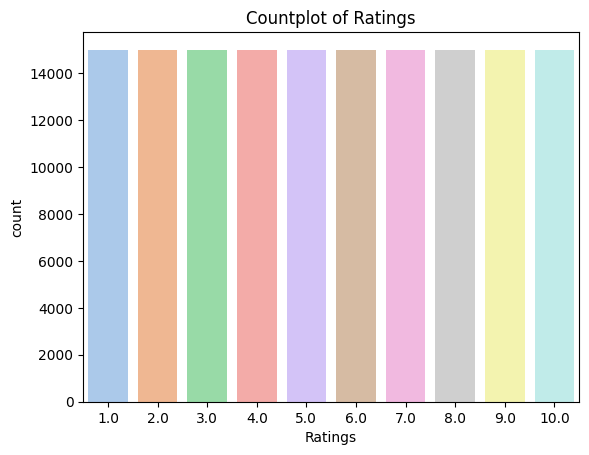

Ratings
1.0     15000
2.0     15000
4.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
3.0     14999
Name: count, dtype: int64


In [ ]:
# Checking for class Imbalance
sns.countplot(x=df['Ratings'],palette='pastel')
plt.title("Countplot of Ratings")
plt.show()
print(df['Ratings'].value_counts())

# The data is balanced and contain equal or similar numbers of rows per each rating

### **vizualization of Important words from positive and negative Reviews**

CPU times: user 45.2 s, sys: 2.26 s, total: 47.5 s
Wall time: 48.5 s


(-0.5, 1199.5, 999.5, -0.5)

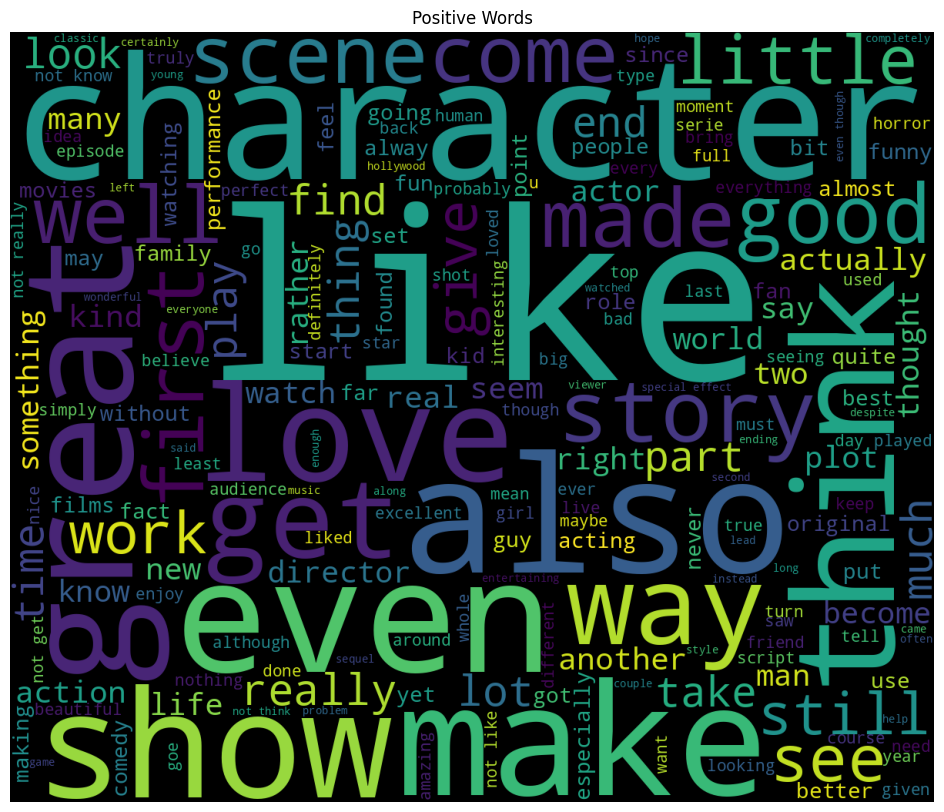

In [ ]:
%%time
sentences=df['Reviews_clean']
pos= ' '.join(map(str,sentences[df['Ratings']>=7]))
neg= ' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud= WordCloud(background_color='black',width=1200,height=1000,
                         stopwords=stop_words, min_font_size=10).generate(pos)

plt.figure(figsize=(15,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Words')
plt.axis('off')

CPU times: user 42.2 s, sys: 1.67 s, total: 43.9 s
Wall time: 56.6 s


(-0.5, 999.5, 999.5, -0.5)

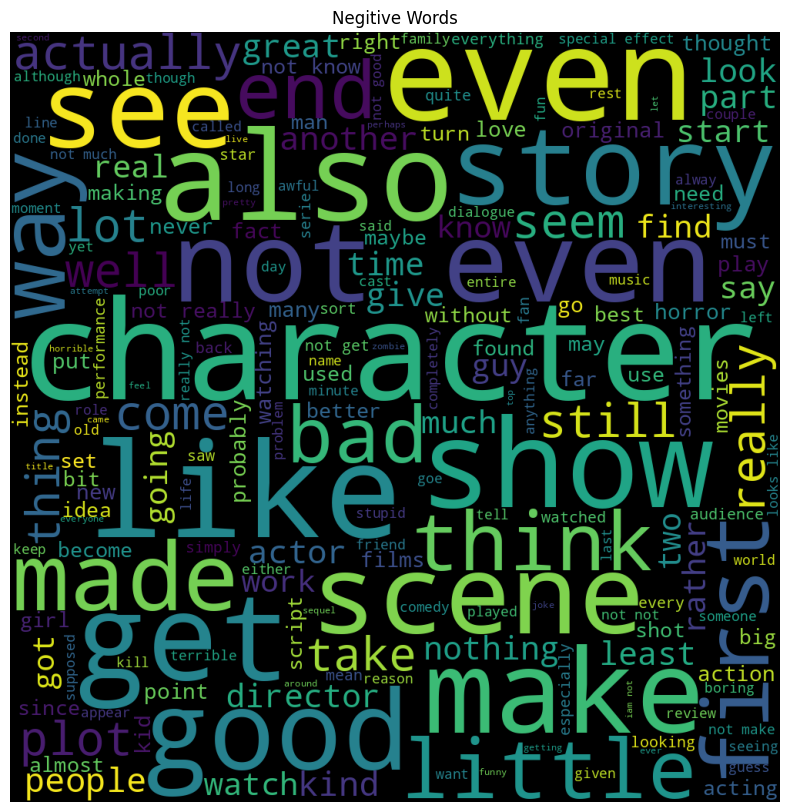

In [ ]:
%%time

neg_wordcloud= WordCloud(background_color='black',width=1000,height=1000,
                         stopwords=stop_words, min_font_size=10).generate(neg)

plt.figure(figsize=(15,10))
plt.imshow(neg_wordcloud)
plt.title('Negitive Words')
plt.axis('off')

### **Basic Statistic of Review Data**

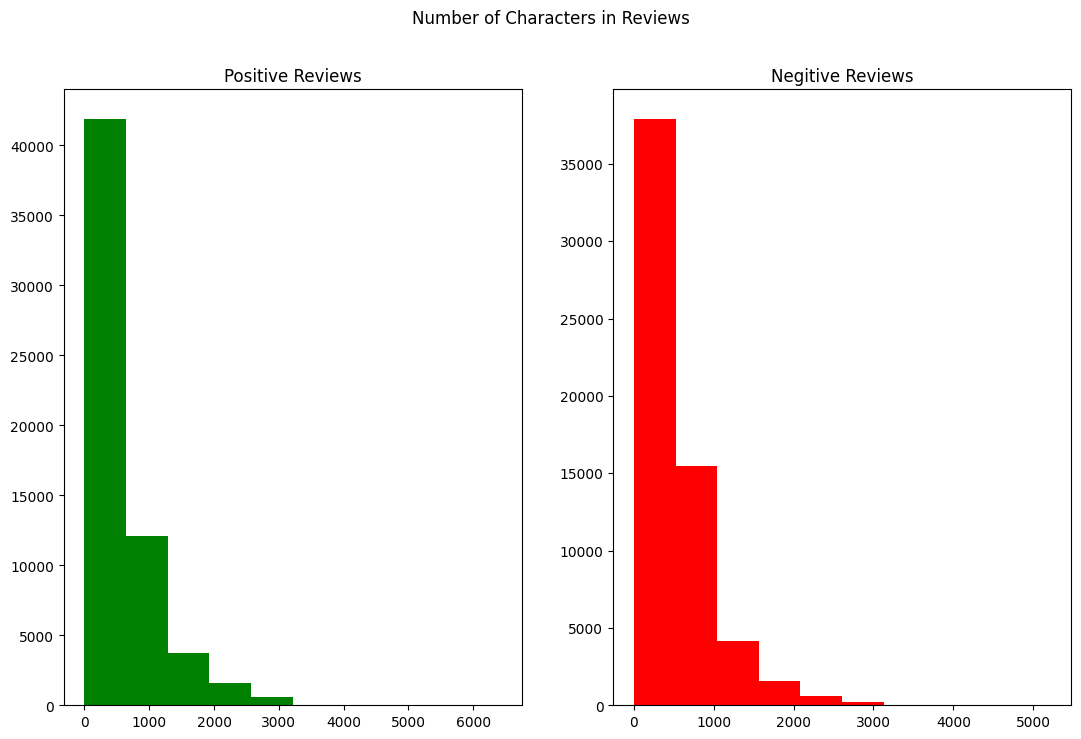

In [ ]:
# Visualization of number of characters in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(13,8))

#plotting length of positive reviews
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')

#plotting length of negative reviews
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negitive Reviews')

figure.suptitle('Number of Characters in Reviews')
plt.show()

Text(0.5, 0.98, 'Average Word Length in Reviews')

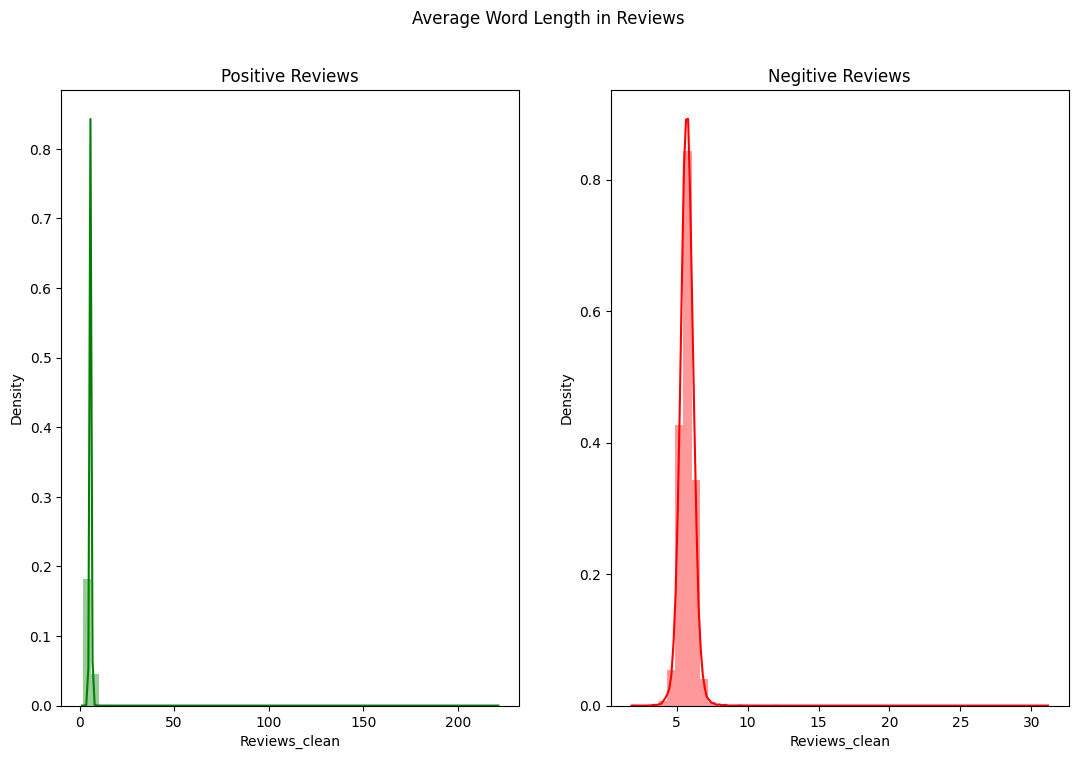

In [ ]:
# Visualize average review length

figure, (pos_ax,neg_ax)= plt.subplots(1,2,figsize=(13,8))

pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')

neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax,color='red')
neg_ax.set_title('Negitive Reviews')

figure.suptitle('Average Word Length in Reviews')

In [ ]:
# Get important feature by using Countvectorizer

def get_top_text_ngrams(corpus, n, g):
  vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [ ]:
# Visualize most common words used in positive reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']>=7]['Reviews_clean'], 20, 1)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common Words in Positive Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Visualize set of most common two words in postive reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']>=7]['Reviews_clean'], 20, 2)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common biagram in Positive Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Visualize set of three most common words used in positive reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']>=7]['Reviews_clean'], 20, 3)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most trigrams in Positive Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Print the data rows where the given words are used

pd.options.display.max_colwidth = 1000
df[['Reviews','Ratings','Movies']][(df['Ratings']>=7) & (df['Reviews'].str.contains("not like | not want | not really"))]

Reviews  \
90059                                                                                                                                                                                                                                     This wasn't a bad diversion if you didn't mind not recognizing anybody but Jeff Fahey. It's what you'd expect in most ways. The Special Forces are called in when Russian mafia try to steal what they think is nuclear fuel, only of course, to have it turn out to be something far more dangerous and unpredictable. I tend to think one CG monster is like the next, except in terms of how cleverly it thinks. I like this one. He was in places I didn't expect (others I did) but most of the time it did what it was asked -- it made sweaty palms. My complaint and it's not really a complaint is not knowing who anybody is. I always like seeing familiar faces. I liked Jo-Bourne Taylor, and there's a guy early on who comes and goes very quickly but the rest are adequate unknowns.   
90104   The only wrong thing this game did is, it came from wrong hands.\nThe reputation of Metal Gear series has been misused.This game may not be having much of story other than Survival in an isolated dimension, build and defend whatever you've got and hope to escape.\nThis may look like summary but this is it!But thing I would really appreciate is the gameplay(that's why I gave 7)\nThis game really understood the concept of surviving which you can clearly see in the game.This game have a terrible start for series lovers and survival lovers but this goes smooth with time.\nStarting from nothing, find, gather, craft, build, defend, expand, grow, fight, save, and at last survive. This game has some repeating process of collecting, eating and fighting but that's really the concept of survival isnt it.\nThis may look boring but it will get interesting with time!!\nMultiplayer is fine. Nothing really different than others but works great if you have some good teammates.Forgot to say there ar...   
90111                                                                                                                                                                                                                                                                                                                                               Although Laser Moon's exposure of female nudity seems a little too much, I think this movie perfect for one of these dreadful long distance flights. It entertains throughout, has its tense built up well. Its plot is easy to understand, and never touches any deep issue. Built around a nightly radio program, Laser Moon's story ends with Traci Lords killing a murderer. Traci does not really stand out here, only giving an average performance. The most memorable role in Laser Moon comes from the girl with the long brown curly hair, harassing the radio-operator.Laser Moon is not a movie to make a run for, but when it falls in your lap it certainly isn't bad either.   
90193                                                                                                                                                                                                                                                                                                                                                                                               Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it â Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like "The Suite Life On Deck",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the sha

In [ ]:
# Visualize set of three most common words used in positive reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']>=7]['Reviews_clean'], 20, 4)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common 4-grams in Positive Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Print the data rows where the given words are used

pd.options.display.max_colwidth = 1000
df[['Reviews','Ratings','Movies']][(df['Ratings']>=7) & (df['Reviews'].str.contains("blah blah blah | la la la | mario mario mario"))]

Reviews  \
108807                                                                                                                                                                                                                                                                                                                            Ok. So I see that a Lot of people on here are seriously trying to trash this Movie. A word of advice for the them... Stop just Stop! This is an Action Flick not an Oscar Worthy Contender where people die slowly and it grips the heart with it's drama...blah blah blah blah blah. Get over yourselves! \nThe movie goes along on a pretty fast pace and manages to give a bit of homage to the original 2 entries while adding a bit of fun and creativity into the Franchise. \nThe theater was packed and for the most part the movie goers enjoyed the ride!\nMy advice is when you go to see the film have some fun and learn not to take every movie out there so frickin seriously!A real movie fan   
109752                                                                                                                                                                                                                                                                                                                                                                          this film is worth watching. A very good Sunday afternoon movie with the family.blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie blah blah blah stop reading this and go watch the movie   
112899  It's the end of September, and once more a beginning of pumpkin spice lattes, football season, and the transitional movie season as we approach the holidays. This weekend, another animated "blockbuster" drops its fangs and sinks itself into the waiting juvenile masses. This vivid description is to serve as an opening for my latest review assignment on Hotel Transylvania 2. While Halloween is still a few weeks off, Adam Sandler and his buddies release their animated sequel in hopes of kicking off October right. Can this franchise keep the same "spirit" of fun and humorous, or does it join the list of unimpressive sequels. Read on to find out. The first Hotel Transylvania was cute and family friendly, qualities that number two amplifies to the next level with Dracula's grandson. Dennis is an adorable, big eyed, high- pitched toddler whose innocence leads our "heroes" to teach him the old monster ways. The kid himself is cute, This journey is very simplistic, filled with half baked sc...   
119515  OK yes shark looks fake blah blah blah but Redwater is a decent enough shark movie only instead of a Great White or Tiger Shark, the shark in this film is a Bull Shark.There have not been many films about Bull Sharks as most of them have been made about their cousins (Great Whites, Makos,Tiger Sharks) so it is refreshing to see one about one of the other killers of the deep. Although this is set in a river (which is where most Bull Sharks have been found) you still wouldn't want to go swimming in it after this bad-boy has swam in.The DVDcase/poster are very misleading though. As you can probably see on the top of this page. It shows a GREAT WHITE on the cover when the film is about a Bull Shark. If that was to attract attention to it, then whoever just picks up the case is going to be bitterly disappointed. Couldn't they have found a way to make a Bull Shark scary on the cover? All in all Redwater isn't a bad film. Yes OK the attacks 

In [ ]:
# Visualize most common words in negative reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']<=4]['Reviews_clean'], 20, 1)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common Words in Negative Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Visualize most common bigrams in negative reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']<=4]['Reviews_clean'], 20, 2)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common Bigrams in Negative Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Visualize most common trigrams in negative reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']<=4]['Reviews_clean'], 20, 3)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common Trigrams in Negative Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Visualize most common 4-grams in negative reviews

most_common_words = get_top_text_ngrams(df[df['Ratings']<=4]['Reviews_clean'], 20, 4)
most_common_words = dict(most_common_words)
temp = pd.DataFrame(columns = ['Common_Words', 'Count'])
temp['Common_Words'] = list(most_common_words.keys())
temp['Count'] = list(most_common_words.values())

fig= px.bar(temp, x='Common_Words', y='Count', title='Most Common 4-grams in Negative Reviews' ,
            orientation='v', width=700, height=700 , color='Common_Words')
fig.show()

In [ ]:
# Print the data rows where the given words are used

pd.options.display.max_colwidth = 1000
df[['Reviews','Ratings','Movies']][(df['Ratings']<=4) & (df['Reviews'].str.contains("good | great"))]

Reviews  \
3      If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...   
6      I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but "Disaster Movie" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged "jokes" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but "Disaster Movie" may just...   
7                                                                                                                                                                                                                                                                                     OK, so "Disastrous" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he "pissed his pants" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the "spoofing" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the "Head On" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.   
11                                                                                                                                                                                                                                                                                                  I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: "Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!"What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat c

# **Feature Engineering**

In [50]:
# Mapping rating data to Binary Label 1(for +ve) if rating>=7 and 0(for -ve) if rating<=4 and 2 (for neutral) if rating=5,6
df['Label']= df['Ratings'].apply(lambda x: '1' if x>=7 else ('0' if x<=4 else '2'))

# Removing
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    60000
0    59999
Name: count, dtype: int64


In [51]:
#Importing dependencies for feature engineering
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk # import nltk

nltk.download('punkt') # Download the punkt resource
nltk.download('wordnet') # Download the wordnet resourc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Lemmatization**

In [52]:
# lemmatization of word
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

## **Vectorization with Count Vectorizer and TDIDF Vectorizer with Unigram**

In [ ]:
# vectorization of train and test data unigrams

train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)

countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)

x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()

x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

### **Feature Importance with Logistic Regression and Count Vectorizer with unigram**

In [ ]:
# Finding the importance of features with the help og Logistic regression and Count vectorizer

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
# Use get_feature_names_out() instead of get_feature_names()
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.052674806341393016  |
|   absolutely   |  0.007179055406010714  |
|     across     |  -0.06482969741189233  |
|      act       |  -0.16633319916523617  |
|     acting     |  -0.21352187908692624  |
|     action     |   0.2769580717261751   |
|     actor      |  -0.15767068953731544  |
|    actress     |   -0.146316899698581   |
|     actual     |  -0.22730979950894845  |
|    actually    | -0.014824816252668242  |
|      add       |   0.0745132403202787   |
|      age       |  0.09258354645497188   |
|     alien      |  -0.08026483365069277  |
|     almost     | -0.016721953839148002  |
|     along      |  0.11117590614226731   |
|    already     |  -0.23073146261728725  |
|      also      |   0.1347844146158547   |
|    although    |  0.22907940682265512   |
|     always     |  0.17742088018850477   |
|    amazing     |   0.801516827

### **Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.27935403638078543   |
|   absolutely   |   0.0982374076345827   |
|     across     |  -0.49129839671473596  |
|      act       |   -1.038647754813898   |
|     acting     |  -1.5856306031815157   |
|     action     |   2.352586885927491    |
|     actor      |   -1.299151349215748   |
|    actress     |  -0.9288319659387125   |
|     actual     |   -1.12164279839189    |
|    actually    |  -0.16482282696083866  |
|      add       |   0.432318331854793    |
|      age       |   0.6321603877860387   |
|     alien      |  -0.2971303893343182   |
|     almost     |  -0.2533818146004001   |
|     along      |   0.7290628039468193   |
|    already     |  -1.1646532106634586   |
|      also      |   1.4538814086238205   |
|    although    |   1.1469421669872628   |
|     always     |   1.3337050534577504   |
|    amazing     |   3.948250038

## **Vectorization with Count Vectorizer and TDIDF Vectorizer with Bigram**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### **Feature Importance with Logistic Regression and Count Vectorizer with Bigram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|   absolutely nothing  |  -1.3757024771032291  |
|     academy award     |   0.7865839935227785  |
|        act like       |  -0.5333121922297888  |
|      acting good      |   0.7336761601667321  |
|       acting not      |  -0.4049887145622609  |
|      action movie     |   0.7615443340984223  |
|       action not      |  0.39144530232688013  |
|      action scene     |  0.34387009701153204  |
|    action sequence    |  0.26226204115211144  |
|     actor actress     |  -0.09792547746845102 |
|       actor not       |  -0.4839617499480038  |
|      actually not     |  -0.0965055313976952  |
|    actually pretty    |  0.11974659391549342  |
|     actually quite    | -0.024490737232147293 |
|      adam sandler     |  0.44139083943761326  |
|         ai not        |  0.056715996271724266 |
|      almost every     |  -0.07850263765442354 |


### **Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram**

In [ ]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+--------------------+----------------------+
|      Feature       |        Score         |
+--------------------+----------------------+
| absolutely nothing |  -2.715449713206032  |
|   academy award    |  1.3466133491169006  |
|      act like      | -1.1895648300195734  |
|    acting good     |  1.308025650892225   |
|     acting not     | -1.0022422890459628  |
|    action movie    |  1.5540079536431797  |
|     action not     |  0.7144744478011194  |
|    action scene    |  0.6769134873163752  |
|  action sequence   |  0.5950419832313337  |
|   actor actress    | -0.22716481568225233 |
|     actor not      | -1.0909019818485985  |
|    actually not    | -0.2814088110954364  |
|  actually pretty   | 0.17995307843644523  |
|   actually quite   | 0.018592416069000053 |
|    adam sandler    |  1.1947421156364089  |
|       ai not       | 0.03769129890198502  |
|    almost every    |  -0.202858712438648  |
|     also good      |  2.636316610533092   |
|     also great     |  2.89507652

In [ ]:
# Checking the review to check if the score is reliable

pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(100)

Reviews  \
120047                                                                                                                                                                                                                                                               While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.   
120239                                                                                                                                                                                                                                                                                                   No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not "get"a film about social media and accelerationism. #duh Someone explain this to me.   
120334  I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for so many young people out there.This is their reality, and however fate made an entrance in these young boys life.It brought them someone that made them believe in themselves. Whether dance is an art to you, or not.Only the true artistic, and creative minds can get this.The art of da...   
120408                                                                                                                                                                                                                                                                                                                                                                      watch this movie! very cool movie with just enough of all the stuff one would think coming from a horror movie entitled War Wolves!i usually look forward to movies w bad reviewsso please keep giving cool movies like this poor reviews!and yea the 3 old timers made a cool movie cooler! Adrianne bar-beau still kicks ares! and yes the movie was funny too! if ya reading this i suggest watching the movie. thank you all the horror movies are real in my mind! yes cool movie very cool. more movies like this should be made more people need to give poor reviews to cool movies i have lots a time o

## **Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### **Feature Importance with Logistic Regression and Count Vectorizer with Trigram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+------------------------+
|          Feature          |         Score          |
+---------------------------+------------------------+
|       acting not bad      |  -0.5945864808330299   |
|      acting not even      |  -1.5020117985144752   |
|      acting not good      |  -1.5199898765578548   |
|     acting pretty good    |   0.5871568175226267   |
|   acting special effect   |  -0.5641274788350541   |
|      action scene not     |   -0.257171681484286   |
|     action take place     |  -0.04680946374670346  |
|       actor good job      |   0.4860477337350952   |
|      actor look like      |  -1.1638029026200394   |
|      actually not bad     |  -0.3175325343727489   |
|    actually pretty good   |  0.38793768639878695   |
|     almost every scene    |   0.0433647272068806   |
|      almost feel like     |   0.5159913859980373   |
|        bad bad bad        |  -1.7448531012242456   |
|        bad guy not        |  -0.10480055082332596  |
|        b

### **Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  -0.6860160668771778  |
|      acting not even      |  -1.7899154471801413  |
|      acting not good      |   -1.614572266164105  |
|     acting pretty good    |   0.5886233288805177  |
|   acting special effect   |  -0.6511011864139554  |
|      action scene not     |  -0.30030082517582674 |
|     action take place     |  -0.06835988477021487 |
|       actor good job      |   0.4677288400892305  |
|      actor look like      |   -1.407280490701316  |
|      actually not bad     |  -0.3523817866129555  |
|    actually pretty good   |  0.37327426578553086  |
|     almost every scene    |  0.013404162305054885 |
|      almost feel like     |   0.512443792235472   |
|        bad bad bad        |  -2.4676679025766233  |
|        bad guy not        |  -0.09405120428512682 |
|        bad not even       

## **Vectorization with Count Vectorizer and TDIDF Vectorizer with 4-gram**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### **Feature Importance with Logistic Regression and Count Vectorizer with 4-gram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         actually character soul better         |  0.036924648252270376 |
|     addictive consistently compelling show     |  0.09423589119583427  |
|        adjective describe good writing         |  0.036924648252270376 |
|                 ai not gon na                  |   -0.341379963040427  |
|             also great also great              |  0.34188866330484924  |
|      always natural layered demonstrates       |  0.036924648252270376 |
|       annoying illogical decision making       |  -0.04678686872690665 |
|         another seen hence reiteration         |  -0.08187549590647918 |
|   appreciation frequent personal experience    |  -0.1574158495230739  |
|          atmosphere due excessive lot          | -0.043545924411556275 |
|        atmosphere least

### **Feature Importance with Logistic Regression and TDIDF Vectorizer with 4-gram**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         actually character soul better         |  0.16816927907434356  |
|     addictive consistently compelling show     |   0.2698643273277167  |
|        adjective describe good writing         |  0.16816927907434356  |
|                 ai not gon na                  |  -0.32867214744848483 |
|             also great also great              |   0.7021454659321074  |
|      always natural layered demonstrates       |  0.16816927907434356  |
|       annoying illogical decision making       |  -0.22472164556510396 |
|         another seen hence reiteration         |  -0.29670597894031786 |
|   appreciation frequent personal experience    |  -0.31223325132264634 |
|          atmosphere due excessive lot          |  -0.20708972805102832 |
|        atmosphere least

## **Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram**

In [55]:
# Considering unigram, bigram and trigram because in 4-gram our coef score is decreasing
# We are getting reliable features in unigram, bigram and trigram

train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
#countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
#tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer="word", tokenizer=LemmaTokenizer(),
                             ngram_range=(1, 3), min_df=5, max_df=0.95,
                             norm='l2', use_idf=True)
#x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
#x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean'])
x_test_tfidf = tfidfvect.transform(test['Reviews_clean'])
y_train = train['Label']
y_test = test['Label']

# **Feature Selection**

## **Feature Selection with Chi squared**

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

Streaming output truncated to the last 5000 lines.
	. away
	. trap
	. thus
	. pig
	. seen
	. developing
	. charles
	. huge
	. dad
	. self
	. sky
	. nerve
	. motion
	. finger
	. chick
	. virus
	. continued
	. pass
	. strike
	. fix
	. wound
	. board
	. marketing
	. oil
	. ball
	. pushed
	. spite
	. linda
	. mob
	. distance
	. australian
	. exorcism
	. flick
	. gordon
	. singer
	. â
	. tell
	. attracted
	. base
	. regardless
	. ocean
	. al
	. egg
	. burst
	. planning
	. rap
	. virgin
	. include
	. corner
	. argument
	. existence
	. illegal
	. contact
	. usually
	. performer
	. grasp
	. par
	. adding
	. passenger
	. prison
	. broke
	. building
	. weapon
	. began
	. outside
	. activity
	. business
	. one
	. distant
	. basis
	. folk
	. involving
	. sheer
	. want
	. outcome
	. colour
	. popular
	. invisible
	. executed
	. extended
	. credible
	. test
	. ricky
	. extremely
	. hook
	. stan
	. defeat
	. drawn
	. reporter
	. rain
	. whenever
	. scenery
	. learned
	. stranded
	. roll
	. legend
	. 

# **Model Selection**

In [56]:
# Importing all dependencies

import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

## **Logistic Regression Model**

In [57]:
# Modify Logistic Regression with class_weight='balanced'
model_1 = Pipeline(
    steps=[
        ("classifier", LogisticRegression(
            penalty='l2',
            dual=False,
            tol=0.0001,
            C=1.0,
            solver='lbfgs',
            max_iter=100,
            class_weight='balanced',  # Add class weight
            multi_class='auto',
            verbose=0,
            warm_start=False,
            n_jobs=None
        ))
    ]
)

# Fit the model on training data (x_train_tfidf and y_train)
model_1.fit(x_train_tfidf, y_train)

Pipeline(steps=[('classifier', LogisticRegression(class_weight='balanced'))])

In [58]:
# Checking accuracy of the model with help of different performance metrics
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))

f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))

f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9288801057155442
AUC Score on training dateset for Logistic Regression: 0.9789071748275506
F1 Score ftraining dateset for Logistic Regression: 0.9288796810950622
Precision Score on test for Logistic Regression: 0.8799166666666667
AUC Score on test for Logistic Regression: 0.9484333542121266
F1 Score for Logistic Regression: 0.8799178587196932
CPU times: user 4.82 s, sys: 21 ms, total: 4.84 s
Wall time: 6.78 s


## **Decision Tree Classifier**

In [ ]:
# DecisionTreeClassifier object
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

# training data to the DecisionTreeClassifier Model
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [ ]:
#Evaluation on test data and training data of Decision Tree Classifier

%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9998333313491827
AUC Score on training dateset for Decision Tree Classifier: 0.9999999064596007
F1 Score training dateset for Decision Tree Classifier: 0.9998333314235907
Precision Score on test for Decision Tree Classifier: 0.6960277777777778
AUC Score on test for Decision Tree Classifier: 0.6962874170559041
F1 Score for Decision Tree Classifier: 0.6960298833606888
CPU times: user 3.69 s, sys: 13.1 ms, total: 3.7 s
Wall time: 3.7 s


## **Decision Tree Classifier with max depth 11 to fix overfit**

In [ ]:
# DecisionTree Classifier with max depth 11
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

# training data to the DecisionTreeClassifier Model
model_3.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7145799354754223
AUC Score on training dateset for Decision Tree Classifier: 0.8041584166868997
F1 Score training dateset for Decision Tree Classifier: 0.7106175519667456
Precision Score on test for Decision Tree Classifier: 0.6889444444444445
AUC Score on test for Decision Tree Classifier: 0.7612908630861486
F1 Score for Decision Tree Classifier: 0.6847450801414724
CPU times: user 3.91 s, sys: 21.7 ms, total: 3.93 s
Wall time: 3.98 s


Accuracy is too low

## **Random Forest Classifier**

In [ ]:
#RandomForest Classifier Object

model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

# training data to the RandomForestClassifier Model
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [ ]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.9998333313491827
AUC Score on training dateset for Random Forest Classifier: 0.9999961189237941
F1 Score training dateset for Random Forest Classifier: 0.9998333314032761
Precision Score on test for Random Forest Classifier: 0.83175
AUC Score on test for Random Forest Classifier: 0.9084271272733002
F1 Score for Random Forest Classifier: 0.8317504342564411
CPU times: user 29.8 s, sys: 44.5 ms, total: 29.9 s
Wall time: 30 s


## **Ada Boost Classifier**

In [ ]:
# AdaBoost Classifier Object
model_5 = Pipeline(
    steps=[("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
        n_estimators=50,  # Reduced from 100
        learning_rate=0.8)),
    ]
)

# training data to adaBoost Classifier
model_5.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                    learning_rate=0.8))])

In [ ]:
#Evaluation on test data and training data of Ada boost Classifier

%%time
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

Precision Score on training dateset for Ada Boost Classifier: 0.8504386956987583
AUC Score on training dateset for Ada Boost Classifier: 0.9322700488426013
F1 Score training dateset for Ada Boost Classifier: 0.8504336457847292
Precision Score on test for Ada Boost Classifier: 0.8215555555555556
AUC Score on test for Ada Boost Classifier: 0.8982664856534054
F1 Score for Random Forest Classifier: 0.821556646050729
CPU times: user 49.6 s, sys: 72.8 ms, total: 49.7 s
Wall time: 50 s


## **Hyperparameter Tunning with Grid Search**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

def hyperparamtune(classifier, param_dist, metric, verbose_value, cv, n_iter=10):
    model = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=param_dist,
        n_iter=n_iter,  # Number of random combinations to try
        scoring=metric,
        verbose=verbose_value,
        cv=cv,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )
    model.fit(x_train_tfidf, y_train)
    print(f"Best Score: {model.best_score_}")
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_dist.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

### Hyperparameter tunning of Logistic **Regression**

In [ ]:
# Define expanded parameter grid
param_gd = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 1.0, 10, 100],  # Added more values
    "tol": [0.0001, 0.001, 0.01],  # Added an additional value
    "max_iter": [100, 200]  # Added another value
}

# Increase the number of iterations to explore more combinations
model_7, best_param = hyperparamtune(LogisticRegression(), param_gd, "accuracy", 10, 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.87229610251744
Best hyperparameter set:
	C: 1.0
	max_iter: 200
	penalty: l2
	tol: 0.0001


In [ ]:
#Evaluation of FineTuned Logsitic Regression Classifier

%%time
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.8917010916796628
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9580818905038534
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.8916996139109731
Precision Score on test for Finetuned Logsitic Regression Classifier: 0.8733611111111111
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.9444792894173378
F1 Score for Finetuned Logsitic Regression Classifier: 0.8733604685994318
CPU times: user 4.39 s, sys: 29.9 ms, total: 4.42 s
Wall time: 6.7 s


### **Hyperparameter Tunning for Random Forest Classifier**

In [ ]:
# Define grid of hyperparameters
%%time
param_gd = {
    "n_estimators": [100, 200, 300],
    "max_depth": [11, 13, 17, 19, 23],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [3, 7, 11],
    "min_samples_leaf": [3, 5],
    "max_features": ["sqrt", "log2"]
}

# Call the function to perform hyperparameter tuning
model_8, best_param_8 = hyperparamtune(RandomForestClassifier(), param_gd, "accuracy", 10, 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 1/5; 1/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.811 total time= 1.1min
[CV 2/5; 1/10] START criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 2/5; 1/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.807 total time= 1.2min
[CV 3/5; 1/10] START criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 3/5; 1/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.812 total time= 1.1min
[CV 4/5; 1/10] START criterion=entropy, max_depth=13, 

In [ ]:
#Evaluation of Finetuned Random Forest Classifier

%%time
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_8.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_8.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_8 =f1_score(y_train,model_8.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_8)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_8.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_8.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_8 =f1_score(y_test,model_8.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_8)

Precision Score on training dateset for Finetuned Random Forest Classifier: 0.8665579352135144
AUC Score on training dateset for Finetuned Random Forest Classifier: 0.9403550933586475
F1 Score training dateset for Finetuned Random Forest Classifier: 0.8665275730757873
Precision Score on test for Finetuned Random Forest Classifier: 0.8378888888888889
AUC Score on test for Finetuned Random Forest Classifier: 0.9144718791243219
F1 Score for Finetuned Random Forest Classifier: 0.8378703440248808
CPU times: user 37.4 s, sys: 87.6 ms, total: 37.5 s
Wall time: 59.2 s


### **Comparing all the model accuracy wise**

In [ ]:
# Dictionary to map model names to their F1 scores
models_f1_scores = {
    "Logistics Regression": f1_score_1,
    "Overfit Decision Tree": f1_score_2,
    "Decision Tree": f1_score_3,
    "Random Forest": f1_score_4,
    "Adaboost Classifier": f1_score_5,
    "Finetuned Logistics Regression": f1_score_7,
    "Finetuned Random Forest": f1_score_8
}

# Find the model with the best F1 score
best_model_name = max(models_f1_scores, key=models_f1_scores.get)
best_f1_score = models_f1_scores[best_model_name]

# Print the results
print(f"{best_model_name} is providing the best F1 score: {best_f1_score:.6f}")


Logistics Regression is providing the best F1 score: 0.873416


### **Graph plot to visualize accuracies of different models**

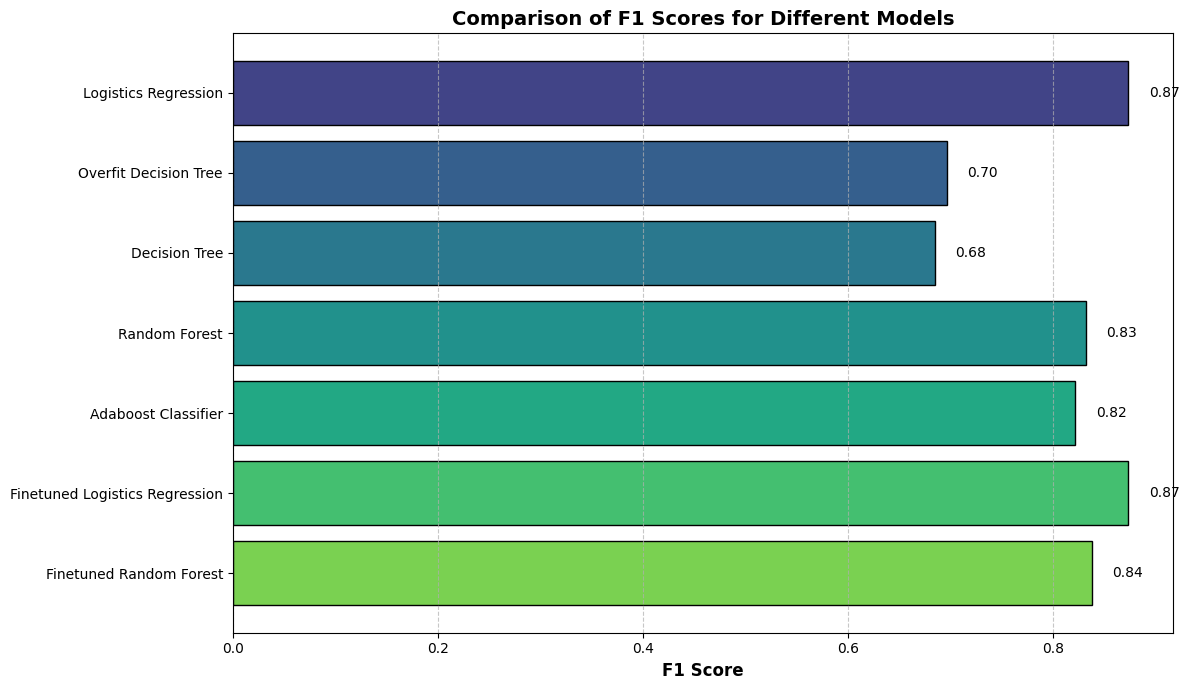

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding F1 scores
models = ['Logistics Regression', 'Overfit Decision Tree', 'Decision Tree',
          'Random Forest', 'Adaboost Classifier', 'Finetuned Logistics Regression',
          'Finetuned Random Forest']
f1_scores = [f1_score_1, f1_score_2, f1_score_3, f1_score_4, f1_score_5, f1_score_7, f1_score_8]

# Define color gradient
colors = plt.get_cmap('viridis')(np.linspace(0.2, 0.8, len(f1_scores)))

# Create the bar plot
plt.figure(figsize=(12, 7))
bars = plt.barh(models, f1_scores, color=colors, edgecolor='black')

# Add annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             va='center', ha='left', fontsize=10, color='black')

# Customize plot
plt.xlabel('F1 Score', fontsize=12, fontweight='bold')
plt.title('Comparison of F1 Scores for Different Models', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest scores at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


# **Model Selected: Logistic Regression**

In [ ]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))

Precision Score for Logistic Regression: 0.8734166666666666
Recall Score for Logistic Regression: 0.8734166666666666
AUC Score for Logistic Regression: 0.9444758386492319
F1 Score for Logistic Regression: 0.8734160803088786
Accuracy Score for Logistic Regression: 0.8734166666666666
CPU times: user 1.6 s, sys: 6.67 ms, total: 1.6 s
Wall time: 1.65 s


In [59]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

# **Confusion metrics**

In [ ]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

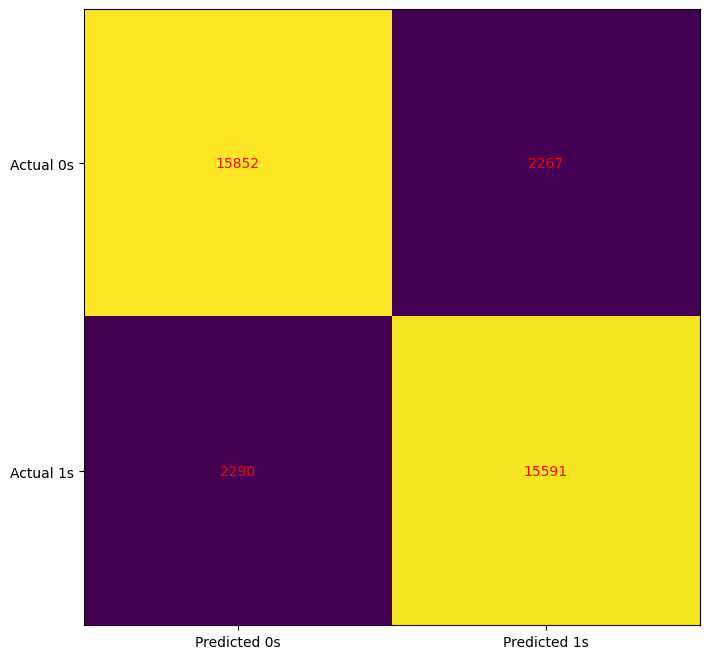

In [ ]:
confusion_matrix_plot(y_test,y_predict)

## **Analyzing False Positive and False Negative**

In [ ]:
!pip install colorama # Install the 'colorama' module.

In [ ]:
print(test.columns)

Index(['Reviews_clean', 'Label'], dtype='object')


In [ ]:
from colorama import Fore, Back, Style

fn_dict = {}
fp_dict = {}
y_test_list = y_test.tolist()  # Convert pandas series to list
y_predict_list = y_predict.tolist()  # Convert pandas series to list

# Define X_test and rating_list before the function call
X_test = test['Reviews_clean']  # The reviews data
rating_list = test['Label'].astype(int)  # Use 'Label' column instead of 'Ratings' and convert to integers

# Define the function
def find_false_negatives_and_positives(X_test, rating_list, y_test_list, y_predict_list):
    for i in range(0, len(X_test)):  # Iterate over X_test
        if ((y_test_list[i] == '0') & (y_predict_list[i] == '1')):
            fp_dict[i] = [X_test.iloc[i], rating_list.iloc[i]] # Use iloc to access elements by position
        elif ((y_test_list[i] == '1') & (y_predict_list[i] == '0')):
            fn_dict[i] = [X_test.iloc[i], rating_list.iloc[i]] # Use iloc to access elements by position
        else:
            pass
    for k, v in fp_dict.items():
        if v[1] <= 2:
            print(Fore.RED + 'False Positive: %s %s' % (k, v))
    for k, v in fn_dict.items():
        if v[1] >= 9:
            print(Fore.GREEN + 'False Negative: %s %s' % (k, v))

# Now call the function to print the false positives and false negatives
find_false_negatives_and_positives(X_test, rating_list, y_test_list, y_predict_list)

False Positive: 40 ['popular show day show also brought frankie muniz worlds show funny without use laughter track also good heart brothers unique qualities made fun parents also funny slightly seasons moments sheer quirkiness think early ones think show tailed last couple seasons large enjoyable enough viewing attracting whole new lease life repeated five us', 0]
False Positive: 66 ['voice not know giving like batman story power done first watched cause not believe', 0]
False Positive: 84 ['make two excellent episodes ruin', 0]
False Positive: 93 ['not best seconds screen got big brother sag card move went audition company friend not get not even remember sad see seconds think mom still proud still missing sag card opened proud gaining entry iatse local hollywood family took care especially not help fight bad sure earned young man ups', 0]
False Positive: 96 ['pun intended summary line predictable defy anyone watching not foreseeing end minutes still fun something attached actors writ

# **Explain Marginal Contribution of Features by Shap**

In [ ]:
!pip install shap # Install the 'shap' module.

In [ ]:
# Initialize JavaScript visualization for SHAP
import shap
shap.initjs()

In [ ]:
# Use a sample of the test data to reduce computation
sample_size = 10000  # Define the sample size
x_test_sample = x_test_tfidf[:sample_size]  # Sample from the test set

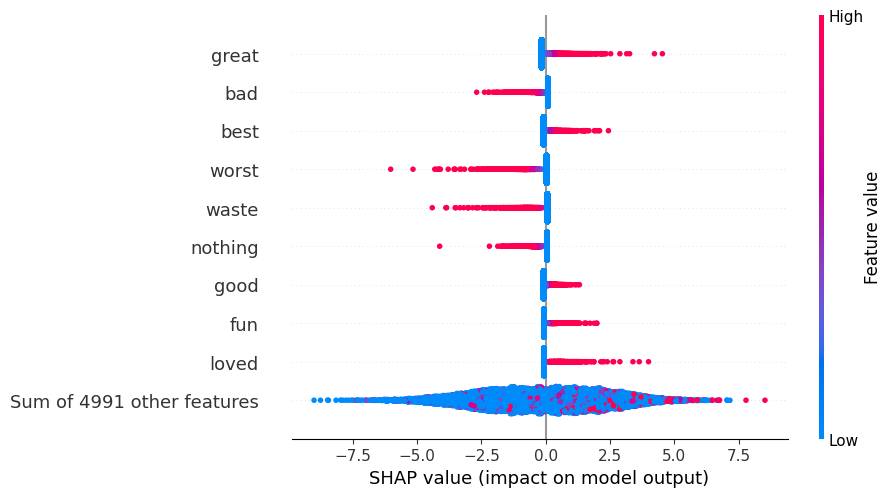

In [ ]:
# Create the explainer with the sample
explainer = shap.Explainer(model_1, x_train_tfidf, feature_names=tfidfvect.get_feature_names_out())
shap_values = explainer(x_test_sample)

# Plot the SHAP values
shap.plots.beeswarm(shap_values)

## **Visualizing Marginal Contribution of Features**

In [ ]:
ind = 4443
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.7316213056930306


In [ ]:
# Convert y_test to a list
y_test_list = y_test.tolist()

# Define the index 'ind' you want to inspect
ind = 0  # or any other valid index

# Print review and its classification
print("Positive" if y_test_list[ind] == '1' else "Negative", "Review:")
print(test['Reviews_clean'].iloc[ind])

Negative Review:
town leffert corners plagued unearthly beings people including local priest woman traumatized death john martense turns claim illicit family bad guys last stand become lot say great pretty good creature gets impression not full moon actually book lurker guide cinema andrew migliore john strysik many full moon lurking fear trailer better feature unfortunate joyner wonderful professional cast script made standout among boring poorly put looks even cheaper probably knowing full probably half crew working doyle bit saying lovecraft themes inbreeding hereditary quick assert nothing particularly remarkable asks question must hands stuart gordon dennis another lovecraft gem rather disposable mess


## **Visualizing Marginal Contribution of Features for False Positive**

In [ ]:
ind = 111
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.5026933630954655


In [ ]:
y_test_list=y_test.tolist()
print("Positive" if y_test_list[ind] else "Negative", "Review:")
# Use test['Reviews_clean'].iloc[ind] to access the review if 'test' is a DataFrame
print(test['Reviews_clean'].iloc[ind])

Positive Review:
anyone right mind think intended applied real fictional joke something used part taken context hubbard wrote fictional movies different entertainment written intention making people think weird crazy fictional not turned religious watch feel sorry take intended fictional not instructional video live


## **Visualizing Marginal Contribution of Features for False Negative**

In [ ]:
ind = 7599
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.9599241320943139


In [ ]:
y_test_list=y_test.tolist()
print("Positive" if y_test_list[ind] else "Negative", "Review:")
# Replace test_list with the actual variable name you intended to use
print(test['Reviews_clean'].iloc[ind])

Positive Review:
requisites person like not ask friend mine told watched little bit stopped found truly funny ihave said lot times love romantic comediesâ still unexpected little romantic comedy finds amusement strangest first way two leads faking kidnapping hides trunk car waiting car thief steals takes garage discovers someone making noiseâ scene fantastic thief acts like not discovers gets girl emily wanted father person cared valued says beginning portrayed alicia silverstone grown person not really grown mischief get millionaire father knows spend amount money find perception silverstone ability going crazy helps development like add silverstone short career discovered aerosmith looked nice got best development relationship emily start wrong foot neither understands ended situation soon deal fact look good together probably part missing old two people fall love two days makes max story ever perfect stories like flexible keep loyal viewer engaged plot alongside dick clement ian la 

# **Working of the model**

In [37]:
# Preprocessing function (based on how you processed your 'Reviews_clean' column)
def preprocess_review(review):
    # Apply the same cleaning steps that you used for 'Reviews_clean'
    # Example cleaning steps (you can adjust this based on your actual preprocessing)
    review = re.sub(r'\W', ' ', review)  # Remove special characters
    review = review.lower()  # Convert to lowercase
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # Remove single characters
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from start
    review = re.sub(r'\s+', ' ', review, flags=re.I)  # Remove multiple spaces
    review = review.strip()  # Strip leading and trailing spaces
    return review

# Function to predict sentiment of a user input
def predict_sentiment(review):
    # Preprocess the input review
    review_clean = preprocess_review(review)

    # Vectorize the cleaned review
    review_tfidf = tfidfvect.transform([review_clean])  # Use the same tfidf vectorizer

    # Predict the sentiment
    prediction = model_1.predict(review_tfidf)

    # Map prediction to sentiment
    if prediction == '1':
        sentiment = "Positive"
    elif prediction == '0':
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment

# Example: Getting input from the user and predicting sentiment
user_review = input("Enter a movie review: ")
sentiment = predict_sentiment(user_review)
print(f"The sentiment of the review is: {sentiment}")

Enter a movie review: DID NOT ENJOY MUCH. I DID NOT SEE ANY MOTHER SENTIMENT AS ALL MY FRIENDS WERE RIEVIEWING. ACTION PACKED BUT NO CONTINUITY IN THE SCREEN PLAY. IT ALL WENT LIKE PLAY.
The sentiment of the review is: Positive


In [60]:
def predict_sentiment(review):
    # Preprocess the input review
    review_clean = preprocess_review(review)

    # Vectorize the cleaned review
    review_tfidf = tfidfvect.transform([review_clean])  # Use the same tfidf vectorizer

    # Predict probabilities instead of labels
    probabilities = model_1.predict_proba(review_tfidf)

    # Check the number of classes in the probabilities array
    num_classes = probabilities.shape[1]

    # Get the predicted probabilities based on the number of classes
    if num_classes == 3:  # For three classes (negative, neutral, positive)
        negative_prob = probabilities[0][0]
        neutral_prob = probabilities[0][1]
        positive_prob = probabilities[0][2]
    elif num_classes == 2:  # For two classes (negative, positive)
        negative_prob = probabilities[0][0]
        positive_prob = probabilities[0][1]
        neutral_prob = 0  # Set neutral probability to 0 if not available

    # Apply custom thresholds
    if neutral_prob > 0.4:
        sentiment = "Neutral"
    elif positive_prob > 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    return sentiment

In [61]:
print(predict_sentiment("DID NOT ENJOY MUCH. I DID NOT SEE ANY MOTHER SENTIMENT AS ALL MY FRIENDS WERE RIEVIEWING. ACTION PACKED BUT NO CONTINUITY IN THE SCREEN PLAY. IT ALL WENT LIKE PLAY."))

Positive
